# Week 8 lab: 

## Aims of this computer lab

* Approximating higher derivatives of periodic functions with finite difference and spectral methods
* Investigating linear vs spectral convergence 

## Third derivatives of periodic functions


In this section, we try to numerically approximate the third derivative of a periodic function using finite difference and spectral methods.

Let's consider 

$$
y = \sin(2x)+\cos(5x)/5
$$

over the interval of ($0, 2\pi$]. 

The third derivative of this function can be written explicitly 

$$
\frac{d^3 y}{d x^3} = -8 \cos(2x) + 25 \sin(5x)
$$

Run the cell below to observe this function and its third derivative 

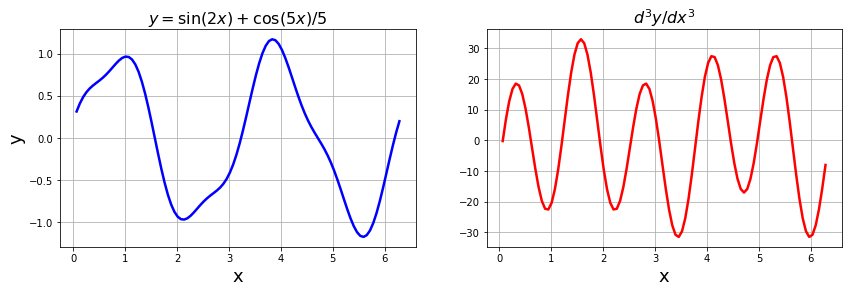

In [1]:
'''
This script is written to plot the function sin(2x)+cos(5x)/5 and its third derivative
'''
import numpy as np
import matplotlib.pyplot as plt

# setting parameters
N = 100 # the number of grid points
x = 2*np.pi*np.arange(1,N+1,1)/N # open-periodic domain from 0 to 2pi
y = np.sin(2*x)+np.cos(5*x)/5 # the function definition
d3y = -8*np.cos(2*x) + 25*np.sin(5*x) # the third derivative of the function calculated analytically

# plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
axes[0].plot(x, y, linewidth = 2.5, color='b')
axes[1].plot(x, d3y, linewidth = 2.5, color='r')
axes[0].grid(True)
axes[0].set_xlabel('x', fontsize=18)  # Add an x-label to the axes.
axes[0].set_ylabel('y', fontsize=18)  # Add a y-label to the axes.
axes[0].set_title("$ y = \sin(2x)+\cos(5x)/5 $",fontsize=16)
axes[1].grid(True)
axes[1].set_xlabel('x', fontsize=18)  # Add an x-label to the axes.
axes[1].set_title("$ d^3 y /d x^3 $",fontsize=16) # Add a y-label to the axes.


plt.show()

### Second-order central difference for the third derivative

Using second-order central difference, one can show

$$
y'''_j\ \approx \frac{y_{j+2}-2y_{j+1}+2y_{j-1}-y_{j-2}}{2 (\Delta x)^3}, \quad \textrm{for} \quad j = 3,4, \dots N-2
$$

<br>
where $y_j = y( x = x_j = j \Delta x)$, with $\Delta x = 2\pi/N$. For boundary points one can use the periodic characteristic of this function and write 

\begin{align*}
    y'''_1 &=  \frac{y_{3}-2y_{2}+2y_{N}-y_{N-1}}{2 (\Delta x)^3} \\
    y'''_2 &=  \frac{y_{4}-2y_{3}+2y_{1}-y_{N}}{2 (\Delta x)^3} \\
    y'''_{N-1} &=  \frac{y_{1}-2y_{N}+2y_{N-2}-y_{N-3}}{2 (\Delta x)^3} \\
    y'''_{N} &=  \frac{y_{2}-2y_{1}+2y_{N-1}-y_{N-2}}{2 (\Delta x)^3}
\end{align*}

🚩 **Approximate the third derivative of $y$ either by forming the differentiation matrix or looping over the formulas above. Choose $N=10$ and $N=100$. Find the error of the third derivative as the absolute value of difference between the exact expression and numerical approximation and plot it from $0$ to $2\pi$. If you form a differentiation matrix, you can use `np.diagflat()`**. 

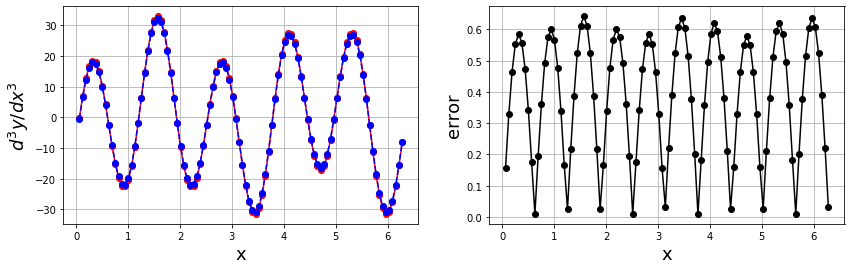

In [2]:
'''
 This script finds a numerical approximation for the third derivative of 
     sin(2x)+cos(5x)/5
 Using 2nd order central differene scheme
''' 
import numpy as np
import matplotlib.pyplot as plt


# setting parameters
N = 100 # the number of grid points
x = 2*np.pi*np.arange(1,N+1,1)/N # open-periodic domain from 0 to 2pi
dx = x[1]-x[0] # the distance between two grid points
y = np.sin(2*x)+np.cos(5*x)/5 # the function definition
d3y_exact = -8*np.cos(2*x) + 25*np.sin(5*x) # the third derivative of the function calculated analytically



# form the vector of y_{j+2} y_p2: y at j plus 2
y_p2 = np.concatenate((y[2:], y[0:2]))
# form the vector of y_{j+1} y_p2: y at j plus 1
y_p1 = np.concatenate((y[1:], y[0:1]))
# form the vector of y_{j-2} y_m2: y at j minus 2
y_m2 = np.concatenate((y[-2:], y[:-2]))
# form the vector of y_{j+1} y_m1: y at j minus 1
y_m1 = np.concatenate((y[-1:], y[:-1]))

# calculating the third derivative using second-order finite difference
d3y_FD2 = (y_p2-2*y_p1+2*y_m1-y_m2)/(2*dx**3)


# plotting results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
axes[0].plot(x, d3y_exact, '-or')
axes[0].plot(x, d3y_FD2,'--ob')
axes[0].grid(True)
axes[0].set_xlabel('x', fontsize=18)  # Add an x-label to the axes.
axes[0].set_ylabel('$ d^3 y /d x^3 $', fontsize=18) # Add a y-label to the axes.
axes[1].grid(True)
axes[1].set_xlabel('x', fontsize=18)  # Add an x-label to the axes.
axes[1].set_ylabel('error', fontsize=18) # Add a y-label to the axes.
axes[1].plot(x, abs(d3y_exact-d3y_FD2), '-ok')

plt.show()

### Fourth-order central difference for the third derivative

🚩 **Use the fourth-order central differencing to approximate the third derivative for the same function as above.**
You can use
[this wikipedia page](https://en.wikipedia.org/wiki/Finite_difference_coefficient) for the formula.

Again you need to utilise the periodic characteristic of the function for the two ends of the interval.

Just like the previous part choose $N=10$ and $N=100$. Find the error of the third derivative as the absolute value of the difference between the exact expression and numerical approximation and plot it from $0$ to $\pi$.  


How much does the error decrease going from second-order to fourth-order?

---
**Solution: **

The error substantially decreases. For example for $N=100$, the maximum error is around 0.63 for the second-order scheme, and it reduces to 0.014 for the fourth-order scheme.

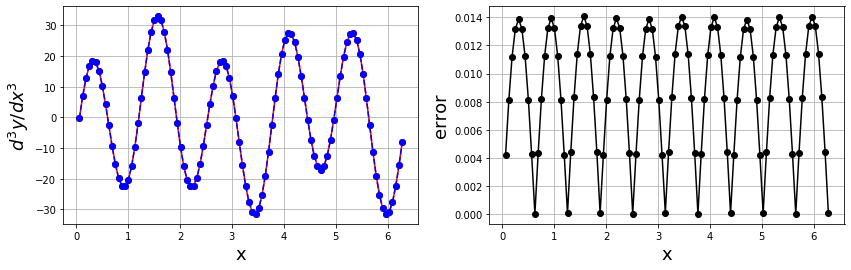

In [7]:
'''
 This script finds a numerical approximation for the third derivative of 
     sin(2x)+cos(5x)/5
 Using 4th order central differene scheme
''' 
import numpy as np
import matplotlib.pyplot as plt

# setting parameters
N = 100 # the number of grid points
x = 2*np.pi*np.arange(1,N+1,1)/N # open-periodic domain from 0 to 2pi
dx = x[1]-x[0] # the distance between two grid points
y = np.sin(2*x)+np.cos(5*x)/5 # the function definition
d3y_exact = -8*np.cos(2*x) + 25*np.sin(5*x) # the third derivative of the function calculated analytically


# form the vector of y_{j+3} y_p3: y at j plus 3
y_p3 = np.concatenate((y[3:], y[0:3]))
# form the vector of y_{j+2} y_p2: y at j plus 2
y_p2 = np.concatenate((y[2:], y[0:2]))
# form the vector of y_{j+1} y_p2: y at j plus 1
y_p1 = np.concatenate((y[1:], y[0:1]))
# form the vector of y_{j+3} y_m2: y at j minus 3
y_m3 = np.concatenate((y[-3:], y[:-3]))
# form the vector of y_{j-2} y_m2: y at j minus 2
y_m2 = np.concatenate((y[-2:], y[:-2]))
# form the vector of y_{j+1} y_m1: y at j minus 1
y_m1 = np.concatenate((y[-1:], y[:-1]))


# calculating the third derivative using forth-order finite difference
d3y_FD4 = (-y_p3+8*y_p2-13*y_p1+13*y_m1-8*y_m2+y_m3)/(8*dx**3)


# plotting results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
axes[0].plot(x, d3y_exact, '-or')
axes[0].plot(x, d3y_FD4,'--ob')
axes[0].grid(True)
axes[0].set_xlabel('x', fontsize=18)  # Add an x-label to the axes.
axes[0].set_ylabel('$ d^3 y /d x^3 $', fontsize=18) # Add a y-label to the axes.
axes[1].grid(True)
axes[1].set_xlabel('x', fontsize=18)  # Add an x-label to the axes.
axes[1].set_ylabel('error', fontsize=18) # Add a y-label to the axes.
axes[1].plot(x, abs(d3y_exact-d3y_FD4), '-ok')

plt.show()

### Spectral methods for the third derivative

Now we try to approximate the third derivative of the same function using spectral methods. In doing so, we take the following steps

1. Take the Fourier tranform of the function $\hat{y}_k = \mathit{F}\{ y\}$. You can use `fft()` from `scipy.fftpack` module in Python for this purpose.
2. Define the set of wavenumber consistent with the definition of Fourier transform implemented in the function you are using (this has been done for you for the `fft()` of `scipy.fftpack` module in the script below, where `k_vec` is defined).
3. Find the third derivative in Fourier space as $\hat{y'''}_k = (i k)^3 \hat{y}_k$.
4. Take the inverse Fourier transform of $\hat{y'''}_k$. You can use `ifft()` from `scipy.fftpack` module in Python for this purpose.

🚩 **Investiage the errors for $N = 4$, $N =10$ and $N=20$. Do you think the results will get better for larger $N$? After which $N$, you don't see any improvement in numerical approximation? Try to first guess this critial $N$ (after which the results do not change much) and then verify it with your code.**

[ 0.  1.  2.  3.  4.  0. -4. -3. -2. -1.]
[-0.  -0.j   -0.  +0.j    4.76-1.55j  0.  -0.j    0.  +0.j   -2.  -0.j
  0.  -0.j    0.  +0.j    4.76+1.55j -0.  -0.j  ]


/Users/hkafiaba/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


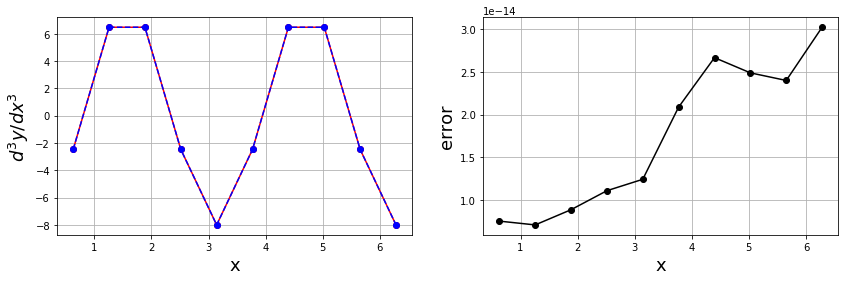

In [21]:
'''
 This script finds a numerical approximation for the third derivative of 
     sin(2x)+cos(5x)/5
 using the Fourier spectral method
''' 
from scipy.fftpack import fft, ifft
import numpy as np
import matplotlib.pyplot as plt


# setting parameters
N = 10 # the number of grid points
x = 2*np.pi*np.arange(1,N+1,1)/N # open-periodic domain from 0 to 2pi
dx = x[1]-x[0] # the distance between two grid points
y = np.sin(2*x)+np.cos(5*x)/5 # the function definition
d3y_exact = -8*np.cos(2*x) + 25*np.sin(5*x) # the third derivative of the function calculated analytically

# Taking the Fourier transform
y_k = fft(y)   

# Forming the vector of discrete wavenumbers 
# (note: slightly different sets are used for N odd and N even)
k_vec=np.zeros(N)
if ((N%2)==0):
    #-even number                                                                                   
    for i in range(1,N//2):
        k_vec[i]=i
        k_vec[N-i]=-i
else:
    #-odd number                                                                                    
    for i in range(1,(N-1)//2):
        k_vec[i]=i
        k_vec[N-i]=-i


# Calculating the third derivative in Fourier space
d3y_k = (1j*k_vec)**3*y_k

# Transforming the third derivative back to real space
d3y_SP = ifft(d3y_k)

# plotting the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
axes[0].plot(x, d3y_exact, '-or')
axes[0].plot(x, d3y_SP,'--ob')
axes[0].grid(True)
axes[0].set_xlabel('x', fontsize=18)  # Add an x-label to the axes.
axes[0].set_ylabel('$ d^3 y /d x^3 $', fontsize=18)
axes[1].grid(True)
axes[1].set_xlabel('x', fontsize=18)  # Add an x-label to the axes.
axes[1].set_ylabel('error', fontsize=18)
axes[1].plot(x, abs(d3y_exact-d3y_SP), '-ok')

plt.show()

**Solution:**
The results do not get better for $N>10$, and they get slightly worse because of rounding error (rounding error increase for large $N$'s as they are more calculations done). This is because with managed to resolve $\sin(5x)$ with 10 Fourier terms.

## Convergence and accuracy of different methods


Calculate the error as the maximum of error for each node
$$
\max_{n \in \left\{ 0, \ldots N \right\}} \left| y'''_{exact} - y'''_{numerical} \right|.
$$

🚩 **Plot this maximum error as a function of $N$ for the three methods (second-order finite difference, fourth-order finite and spectral) and discuss your results. This is not the best example to assess the convergence of spectral method. Can you explain why?**

---
**Solution:**
This is not the best example for assessing the convergence of spectral methods, because it consists of limited sines and cosines, which are the building elements of Fourier transform. It is somewhat like using linear function to assess the convergence of finite difference method (we get an exact answer even with a very few nodes).

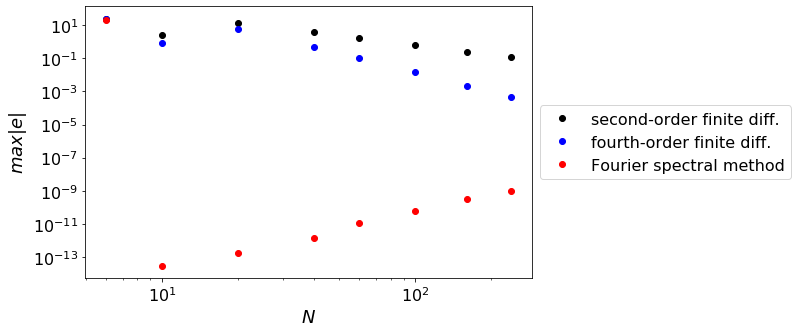

In [23]:
from scipy.fftpack import fft, ifft
import numpy as np
import matplotlib.pyplot as plt

N_range = np.array([6, 10, 20, 40, 60, 100, 160, 240])
error_FD2 = np.zeros(np.size(N_range))
error_FD4 = np.zeros(np.size(N_range))
error_SP = np.zeros(np.size(N_range))

for iN, N in enumerate(N_range):
    x = 2*np.pi*np.arange(1,N+1,1)/N # open-periodic domain from 0 to 2pi
    dx = x[1]-x[0]
    y = np.sin(2*x)+np.cos(5*x)/5
    d3y_exact = -8*np.cos(2*x) + 25*np.sin(5*x)
    
    # calculating the SPECTRAL SOLUTION
    y_k = fft(y)   
    k_vec=np.zeros(N)
    if ((N%2)==0):
        #-even number                                                                                   
        for i in range(1,N//2):
            k_vec[i]=i
            k_vec[N-i]=-i
    else:
        #-odd number                                                                                    
        for i in range(1,(N-1)//2):
            k_vec[i]=i
            k_vec[N-i]=-i
    d3y_k = (1j*k_vec)**3*y_k
    d3y_SP = ifft(d3y_k)
    
    # calculating the FINITE DIFFERENCE SOLUTION
    # form the vector of y_{j+3} y_p3: y at j plus 3
    y_p3 = np.concatenate((y[3:], y[0:3]))
    # form the vector of y_{j+2} y_p2: y at j plus 2
    y_p2 = np.concatenate((y[2:], y[0:2]))
    # form the vector of y_{j+1} y_p2: y at j plus 1
    y_p1 = np.concatenate((y[1:], y[0:1]))
    # form the vector of y_{j+3} y_m2: y at j minus 3
    y_m3 = np.concatenate((y[-3:], y[:-3]))
    # form the vector of y_{j-12} y_m2: y at j minus 2
    y_m2 = np.concatenate((y[-2:], y[:-2]))
    # form the vector of y_{j+1} y_m1: y at j minus 1
    y_m1 = np.concatenate((y[-1:], y[:-1]))
    
    # calculating the third derivative using forth-order finite difference
    d3y_FD4 = (-y_p3+8*y_p2-13*y_p1+13*y_m1-8*y_m2+y_m3)/(8*dx**3)
    # calculating the third derivative using second-order finite difference
    d3y_FD2 = (y_p2-2*y_p1+2*y_m1-y_m2)/(2*dx**3)
    
    error_FD2[iN] = np.max(abs(d3y_exact-d3y_FD2))
    error_FD4[iN] = np.max(abs(d3y_exact-d3y_FD4))
    error_SP[iN] = np.max(abs(d3y_exact-d3y_SP))
    
    
fig, ax = plt.subplots(figsize=(8, 5))    
ax.plot(N_range, error_FD2, 'ok', label = 'second-order finite diff.')
ax.plot(N_range, error_FD4, 'ob', label = 'fourth-order finite diff.')
ax.plot(N_range, error_SP, 'or', label = 'Fourier spectral method')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$N$', fontsize=18)  # Add an x-label to the axes.
ax.set_ylabel(r'$max|e|$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# Put a legend to the right of the current axis
ax.legend(loc='center left', fontsize = 16, bbox_to_anchor=(1, 0.5))
plt.show() 

🚩 **Repeat the whole experiment for the following function:**
$$
y = e^{\sin(x)}
$$
with the exact third derivative 
$$
y = -\cos(x)\ (1 - \cos^2(x) + 3 \sin(x)) e^{\sin(x)}
$$
**Plot the maximum error of the three methods for the third derivative of this function as a function of $N$**.

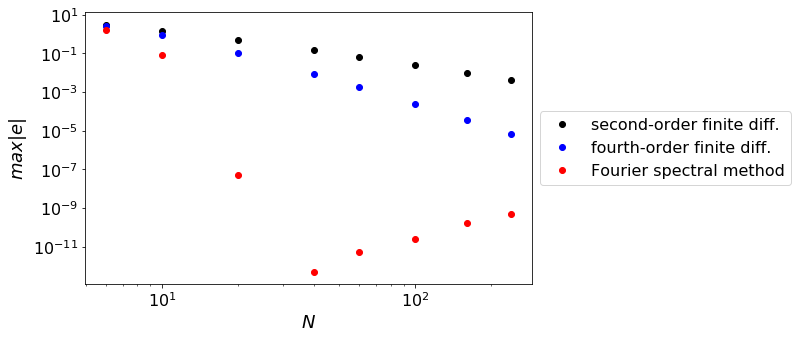

In [24]:
from scipy.fftpack import fft, ifft
import numpy as np
import matplotlib.pyplot as plt

N_range = np.array([6, 10, 20, 40, 60, 100, 160, 240])
error_FD2 = np.zeros(np.size(N_range))
error_FD4 = np.zeros(np.size(N_range))
error_SP = np.zeros(np.size(N_range))

for iN, N in enumerate(N_range):
    x = 2*np.pi*np.arange(1,N+1,1)/N # open-periodic domain from 0 to 2pi
    dx = x[1]-x[0]
    y = np.exp(np.sin(x))
    d3y_exact = -np.cos(x)*(1 - (np.cos(x))**2 + 3*np.sin(x))*np.exp(np.sin(x))
    
    # calculating the SPECTRAL SOLUTION
    y_k = fft(y)   
    k_vec=np.zeros(N)
    if ((N%2)==0):
        #-even number                                                                                   
        for i in range(1,N//2):
            k_vec[i]=i
            k_vec[N-i]=-i
    else:
        #-odd number                                                                                    
        for i in range(1,(N-1)//2):
            k_vec[i]=i
            k_vec[N-i]=-i
    d3y_k = (1j*k_vec)**3*y_k
    d3y_SP = ifft(d3y_k)
    
    # calculating the FINITE DIFFERENCE SOLUTION
    # form the vector of y_{j+3} y_p3: y at j plus 3
    y_p3 = np.concatenate((y[3:], y[0:3]))
    # form the vector of y_{j+2} y_p2: y at j plus 2
    y_p2 = np.concatenate((y[2:], y[0:2]))
    # form the vector of y_{j+1} y_p2: y at j plus 1
    y_p1 = np.concatenate((y[1:], y[0:1]))
    # form the vector of y_{j+3} y_m2: y at j minus 3
    y_m3 = np.concatenate((y[-3:], y[:-3]))
    # form the vector of y_{j-12} y_m2: y at j minus 2
    y_m2 = np.concatenate((y[-2:], y[:-2]))
    # form the vector of y_{j+1} y_m1: y at j minus 1
    y_m1 = np.concatenate((y[-1:], y[:-1]))
    
    # calculating the third derivative using forth-order finite difference
    d3y_FD4 = (-y_p3+8*y_p2-13*y_p1+13*y_m1-8*y_m2+y_m3)/(8*dx**3)
    # calculating the third derivative using second-order finite difference
    d3y_FD2 = (y_p2-2*y_p1+2*y_m1-y_m2)/(2*dx**3)
    
    error_FD2[iN] = np.max(abs(d3y_exact-d3y_FD2))
    error_FD4[iN] = np.max(abs(d3y_exact-d3y_FD4))
    error_SP[iN] = np.max(abs(d3y_exact-d3y_SP))
    
    
fig, ax = plt.subplots(figsize=(8, 5))    
ax.plot(N_range, error_FD2, 'ok', label = 'second-order finite diff.')
ax.plot(N_range, error_FD4, 'ob', label = 'fourth-order finite diff.')
ax.plot(N_range, error_SP, 'or', label = 'Fourier spectral method')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$N$', fontsize=18)  # Add an x-label to the axes.
ax.set_ylabel(r'$max|e|$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# Put a legend to the right of the current axis
ax.legend(loc='center left', fontsize = 16, bbox_to_anchor=(1, 0.5))
plt.show() 